In [2]:
!pip install scikit-learn==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.8 MB/s eta 0:00:00


In [56]:
import numpy as np
import pickle
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
np.set_printoptions(legacy='1.25')

## **Uploading data**

In [57]:
from google.colab import files
uploaded = files.upload()

X = np.load("X_train.npy", allow_pickle=True)
y = np.load("Y_train.npy", allow_pickle=True)

Saving Y_train.npy to Y_train (1).npy
Saving X_train.npy to X_train (1).npy


## **Analysing data**

In [58]:
print(max(y))
max_y = np.argmax(y)
print(X[max_y, :])

print(min(y))
min_y = np.argmin(y)
print(X[min_y, :])

print(X.shape)
print(y.shape)

5.407716175980241
[ 66.0732695    0.86926302  -9.83477451 -40.64706719   1.00935497
   0.44854005]
-4.556189169946358
[ 96.62020794   0.80883594   1.88589932 122.44039913  -3.31573761
 -30.52185505]
(700, 6)
(700,)


## **Correlation Matrix**

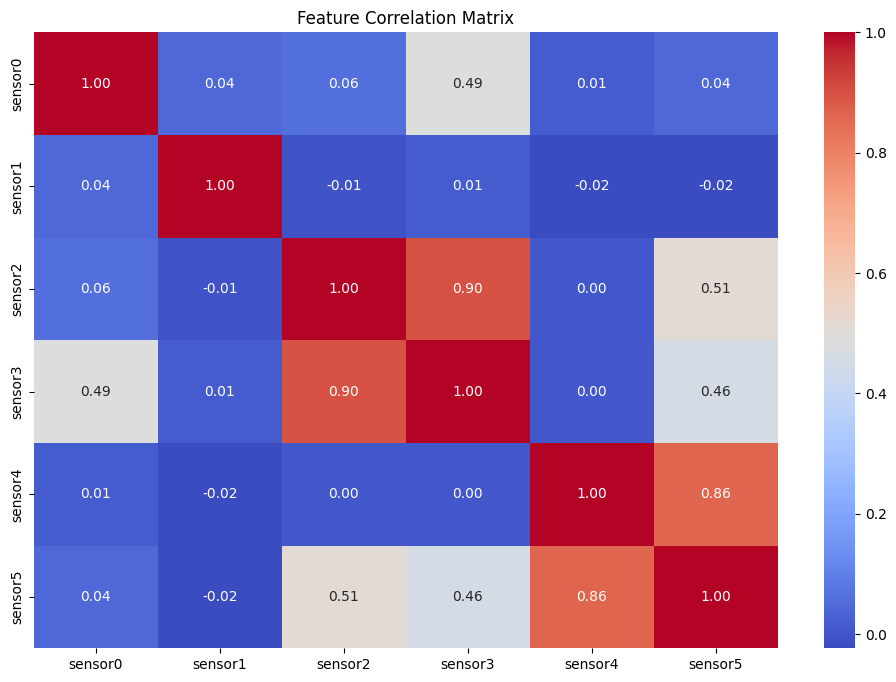

In [59]:
feature_names = [f"sensor{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

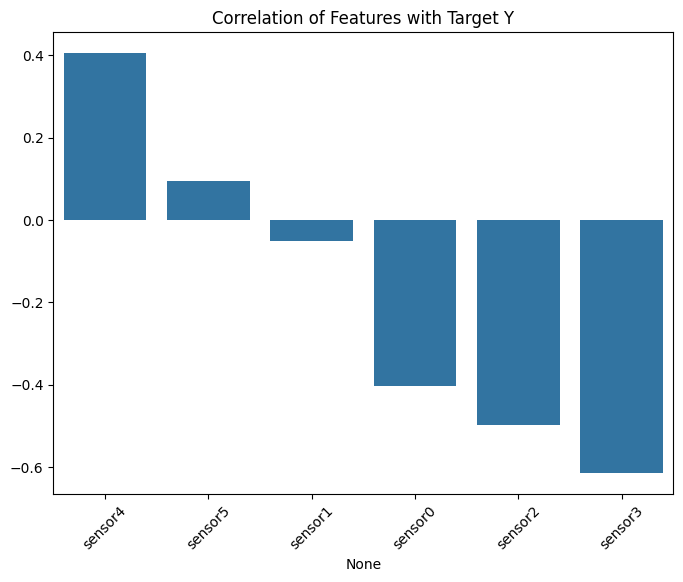

In [60]:
df["y"] = y.ravel()

corr_with_target = df.corr()["y"].drop("y").sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=45)
plt.title("Correlation of Features with Target Y")
plt.show()


# **Plotting y as a function of each feature**

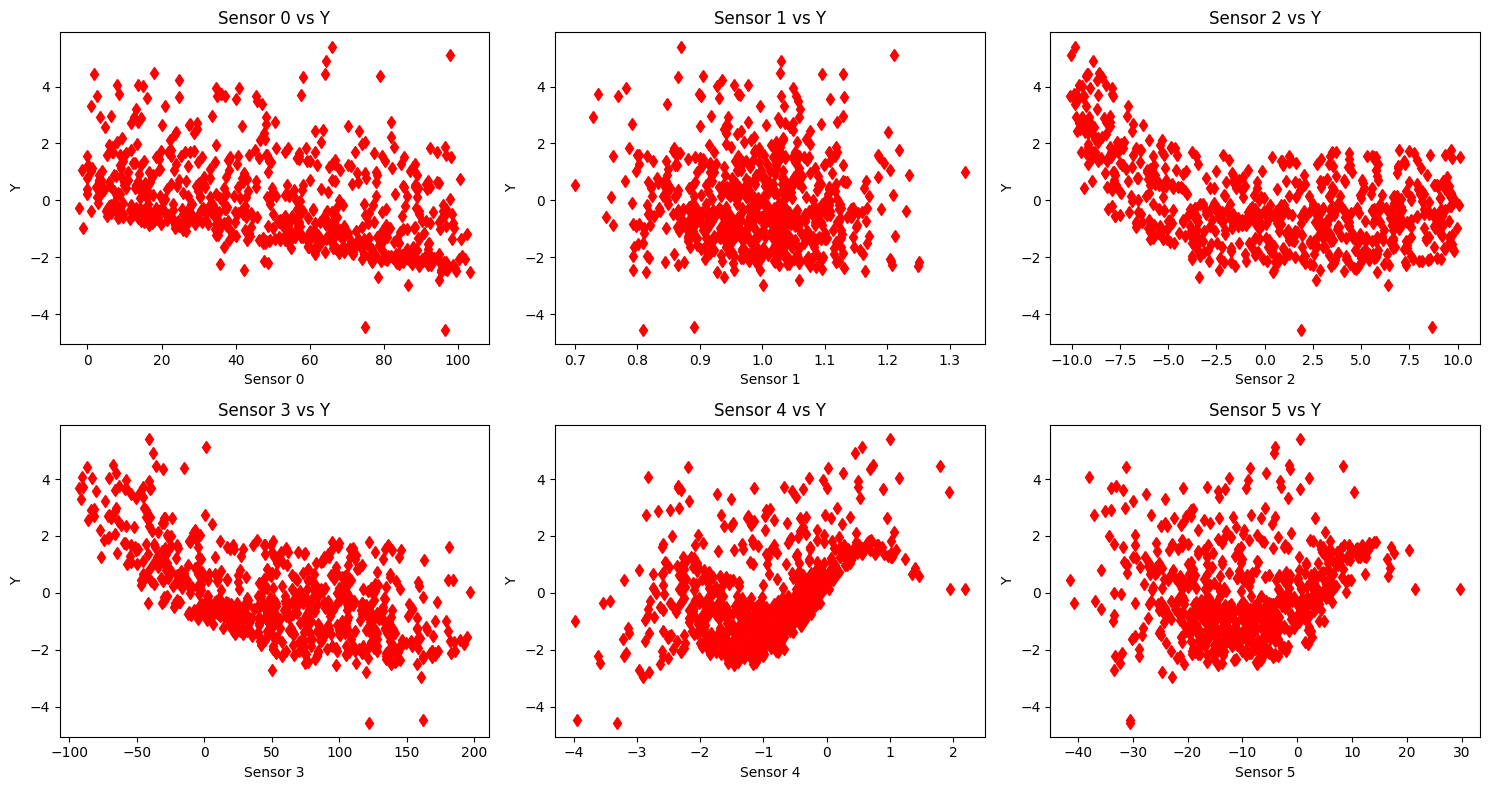

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(6):
    axes[i].plot(X[:, i], y, 'rd')
    axes[i].set_xlabel(f"Sensor {i}")
    axes[i].set_ylabel("Y")
    axes[i].set_title(f"Sensor {i} vs Y")

plt.tight_layout()
plt.show()


## **Dividing data into training and validation set**

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#several random seeds were tested to ensure the models generalized well

print(max(y_train))
print(max(y_val))
print(min(y_train))
print(min(y_val))

5.407716175980241
4.433550554913713
-4.556189169946358
-4.449323263298666


## **Training and comparing different models**

-Polynomial Regression with Ridge and Lasso regularization;

-Polynomial Kernel Ridge Regression;

-RBF Kernel Ridge Regression;

-Polynomial Support Vector Regression;

-RBF Support Vector Regression.


In [67]:
#Polynomial Regression (Ridge)

r2_mean_poly = []
mse_mean_poly = []
for i in range(1, 7):
  degree = i
  model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=2.12))

  scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
  scores2 = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  r2_mean_poly += [scores1.mean()]
  mse_mean_poly += [-scores2.mean()]

print(r2_mean_poly)
print(max(r2_mean_poly))
print(np.argmax(r2_mean_poly)+1)
print(mse_mean_poly)
print(min(mse_mean_poly))
print(np.argmin(mse_mean_poly)+1)

[0.5461158949485655, 0.7922514085427357, 0.8107144647276684, 0.9333507172613882, 0.909715493757577, 0.8110579701447144]
0.9333507172613882
4
[1.0559773750788843, 0.4859104860479685, 0.44664565895310293, 0.16178149346019166, 0.2217388767094602, 0.42989276317540215]
0.16178149346019166
4


In [68]:
#Final Polynomial Regression (Ridge) model

final_model_ridge_polyreg = make_pipeline(PolynomialFeatures(4), StandardScaler(), Ridge(alpha=2.12))

final_model_ridge_polyreg.fit(X_train, y_train)

y_pred = final_model_ridge_polyreg.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

print("Best degree:", 4)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Best degree: 4
Validation R²: 0.9397911009076574
Validation MSE: 0.13706557625335283


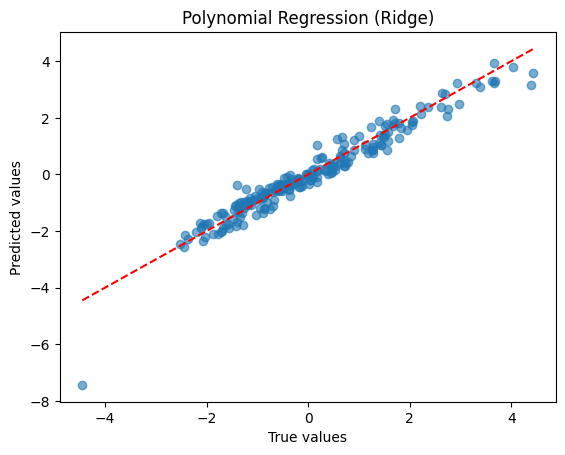

In [69]:
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression (Ridge)")
plt.show()

In [70]:
#Polynomial Regression (Lasso)

r2_mean_poly = []
mse_mean_poly = []
for i in range(1, 9):
  degree = i
  model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=0.01, max_iter=100000))

  scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
  scores2 = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  r2_mean_poly += [scores1.mean()]
  mse_mean_poly += [-scores2.mean()]

print(r2_mean_poly)
print(max(r2_mean_poly))
print(np.argmax(r2_mean_poly)+1)
print(mse_mean_poly)
print(min(mse_mean_poly))
print(np.argmin(mse_mean_poly)+1)

[0.5469132971452846, 0.7929935590447232, 0.8155771743345239, 0.940146176917953, 0.9250150313983638, 0.9147361594774635, 0.9411822290619882, 0.9352924661380617]
0.9411822290619882
7
[1.0542636253629376, 0.4849089993084463, 0.4344748714385326, 0.14047108574491057, 0.18107615283280193, 0.20896321332757814, 0.13765935950001798, 0.153068798659655]
0.13765935950001798
7


In [71]:
#Final Polynomial Regression (Lasso) model

final_model_ridge_polyreg = make_pipeline(PolynomialFeatures(7), StandardScaler(), Lasso(alpha=0.01, max_iter=100000))

final_model_ridge_polyreg.fit(X_train, y_train)

y_pred = final_model_ridge_polyreg.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

print("Best degree:", 7)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Best degree: 7
Validation R²: 0.815377423571664
Validation MSE: 0.4202933488074172


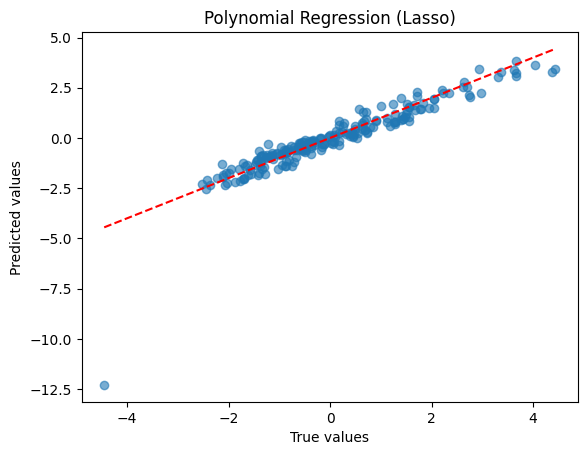

In [72]:
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression (Lasso)")
plt.show()

In [73]:
#Polynomial Kernel Ridge Regression

r2_mean_poly = []
mse_mean_poly = []
for i in range(1, 7):
  d = i
  model = make_pipeline(StandardScaler(), KernelRidge(alpha=2.67, kernel="polynomial", degree=d))

  scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
  scores2 = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  r2_mean_poly += [scores1.mean()]
  mse_mean_poly += [-scores2.mean()]

print(r2_mean_poly)
print(max(r2_mean_poly))
print(np.argmax(r2_mean_poly)+1)
print(mse_mean_poly)
print(min(mse_mean_poly))
print(np.argmin(mse_mean_poly)+1)

[0.5462173187857866, 0.7922079970281486, 0.8021685612691373, 0.9529046032517137, 0.8988035843906836, 0.8162348744229334]
0.9529046032517137
4
[1.0567389317315947, 0.48634804733855147, 0.46954784850896336, 0.1094705408460241, 0.24307627475345503, 0.4219814618088275]
0.1094705408460241
4


In [74]:
#Final Polynomial Kernel Ridge Regression model

final_model_ridge_polykernel = make_pipeline(StandardScaler(), KernelRidge(alpha=2.67, kernel="polynomial", degree=4))

final_model_ridge_polykernel.fit(X_train, y_train)

y_pred = final_model_ridge_polykernel.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

print("Best degree:", 4)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Best degree: 4
Validation R²: 0.9451015864915092
Validation MSE: 0.12497625428087465


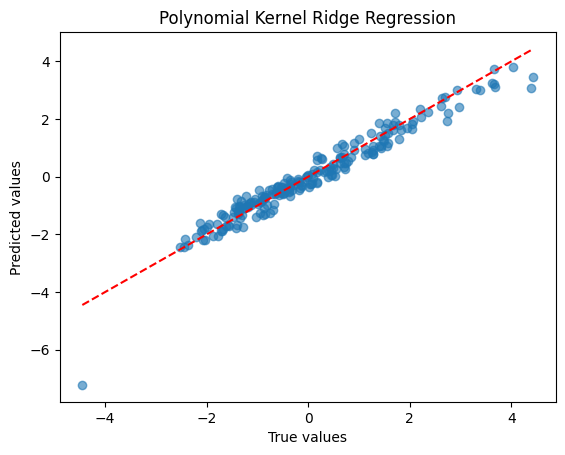

In [75]:
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Polynomial Kernel Ridge Regression")
plt.show()

In [94]:
#RBF Kernel Ridge Regression

#gammas = np.logspace(-6, 2, 9)  # values from 1e-6 to 1e2
#gammas = [0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]

r2_mean_rbf = []
mse_mean_rbf = []
for v in gammas:
  model = make_pipeline(StandardScaler(), KernelRidge(alpha=0.001, kernel="rbf", gamma=v))

  scores1 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
  scores2 = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  r2_mean_rbf += [scores1.mean()]
  mse_mean_rbf += [-scores2.mean()]

print(r2_mean_rbf)
print(max(r2_mean_rbf))
print(gammas[np.argmax(r2_mean_rbf)])
print(mse_mean_rbf)
print(min(mse_mean_rbf))
print(gammas[np.argmin(mse_mean_rbf)])

[0.9885941176594105, 0.9895791938901031, 0.9900036473144211, 0.9900854290005883, 0.9899491969426748, 0.9896658863597116, 0.9892774333564178, 0.988809491114767, 0.9882779262927535, 0.9876925177574913]
0.9900854290005883
0.14
[0.02777506600390752, 0.025189450722044354, 0.02406467359232173, 0.0238391271605454, 0.024187629468881706, 0.024922304816406622, 0.025929627706138186, 0.027138278428663242, 0.028503192501859113, 0.029996600054882555]
0.0238391271605454
0.14


In [110]:
#Final RBF Kernel Ridge Regression model
#This is our chosen model for submission.

final_model_ridge_rbf = make_pipeline(
    StandardScaler(),
    KernelRidge(alpha=0.001, kernel="rbf", gamma=0.14))

final_model_ridge_rbf.fit(X_train, y_train)

y_pred = final_model_ridge_rbf.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

joblib.dump(final_model_ridge_rbf, "final_model.pkl")
print("Best gamma:", 0.14)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Best gamma: 0.14
Validation R²: 0.9849349167947131
Validation MSE: 0.03429566628797527


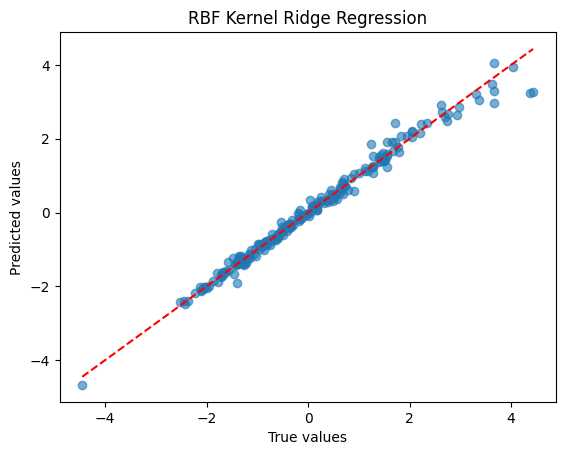

In [106]:
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("RBF Kernel Ridge Regression")
plt.show()

In [23]:
#Polynomial Support Vector Regression

pipe = make_pipeline(StandardScaler(), SVR(kernel="poly", coef0=1))

param_grid = {
    "svr__C": [0.1, 1, 10, 100],
    "svr__degree": [3, 4, 5, 6],
    "svr__epsilon": [0.01, 0.1, 0.5, 1.0],
    #"svr__coef0": [0, 0.5, 1, 2]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

KeyboardInterrupt: 

In [80]:
#Final Polynomial Support Vector Regression model

final_model_svr_poly = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=6, C=1, epsilon=0.01, coef0=1))
final_model_svr_poly.fit(X_train, y_train)

y_pred = final_model_svr_poly.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

print("Best degree:", 6)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Best degree: 6
Validation R²: 0.9796671363445637
Validation MSE: 0.04628777001118876


In [101]:
#RBF Support Vector Regression

pipe = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

param_grid = {
    #"svr__C": [0.1, 1, 10, 100],
    #"svr__C": [90, 100, 200, 500],
    #"svr__C": [50, 75, 90, 100],
    "svr__C": [60, 70, 80],
    #"svr__epsilon": [0.01, 0.1, 0.5, 1.0],
    "svr__epsilon": [0.02, 0.03, 0.04, 0.05],
    "svr__gamma": ["scale", 0.01, 0.1, 1]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best params: {'svr__C': 70, 'svr__epsilon': 0.02, 'svr__gamma': 'scale'}
Best CV score: 0.9896380916470011


In [107]:
#Final RBF Support Vector Regression model

final_model_svr_rbf = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=70, epsilon=0.02, gamma='scale'))

final_model_svr_rbf.fit(X_train, y_train)

y_pred = final_model_svr_rbf.predict(X_val)
val_r2 = r2_score(y_val, y_pred)
val_mse = mean_squared_error(y_val, y_pred)

print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

Validation R²: 0.9848468814292428
Validation MSE: 0.03449607882301181


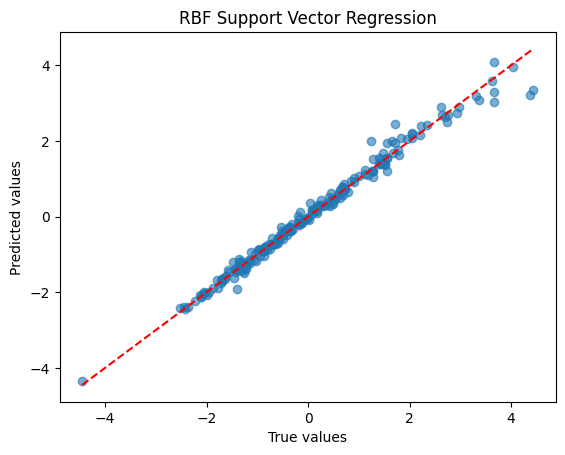

In [108]:
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("RBF Support Vector Regression")
plt.show()